### A little statistics

In [65]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import integrate

### Question 1) Sigma Analysis

In [66]:
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)
print(stats.norm.cdf(1)) #Giving correct value
print(stats.norm.ppf(0.8413447460685429)) #Giving correct value
print(stats.norm.cdf(-1)) #Giving correct value
print(stats.norm.cdf(-3)) #Giving correct value
print(stats.norm.ppf(0.0013498980316300933))
print(stats.norm.cdf(.1)) #Giving correct value
print(stats.norm.ppf(0.539827837277029))

0.8413447460685429
1.0
0.15865525393145707
0.0013498980316300933
-3.0000000000000004
0.539827837277029
0.10000000000000002


Currently a positive sigma refers the the area under the curve to the left of the point we define and if a negative sigma is passed in it still measures the integral or area under the curve to the left of the defined value. Another way of seeing it is that, if we take x to mean stat.norm.cdf(1), then stats.norm.cdf(-1) = 1 - x or the area to the right of sigma = 1. I'll deal with it by using it if I am looking for the integral to the right of a signma value. Or I will do (1 - cdf(positive(sigma))).

Negative sigma refers to a sigma value to the left of the mean

### Question 2) Rayleigh Distribution

The Rayleigh distribution is a continuous probability disribution for non-negative valued random variables. One use case of this distribution is modelling wind speeds in two dimensions. It takes a scale parameter, sigma, which is the mode.

In [67]:
d = stats.rayleigh.rvs(size = 100000)

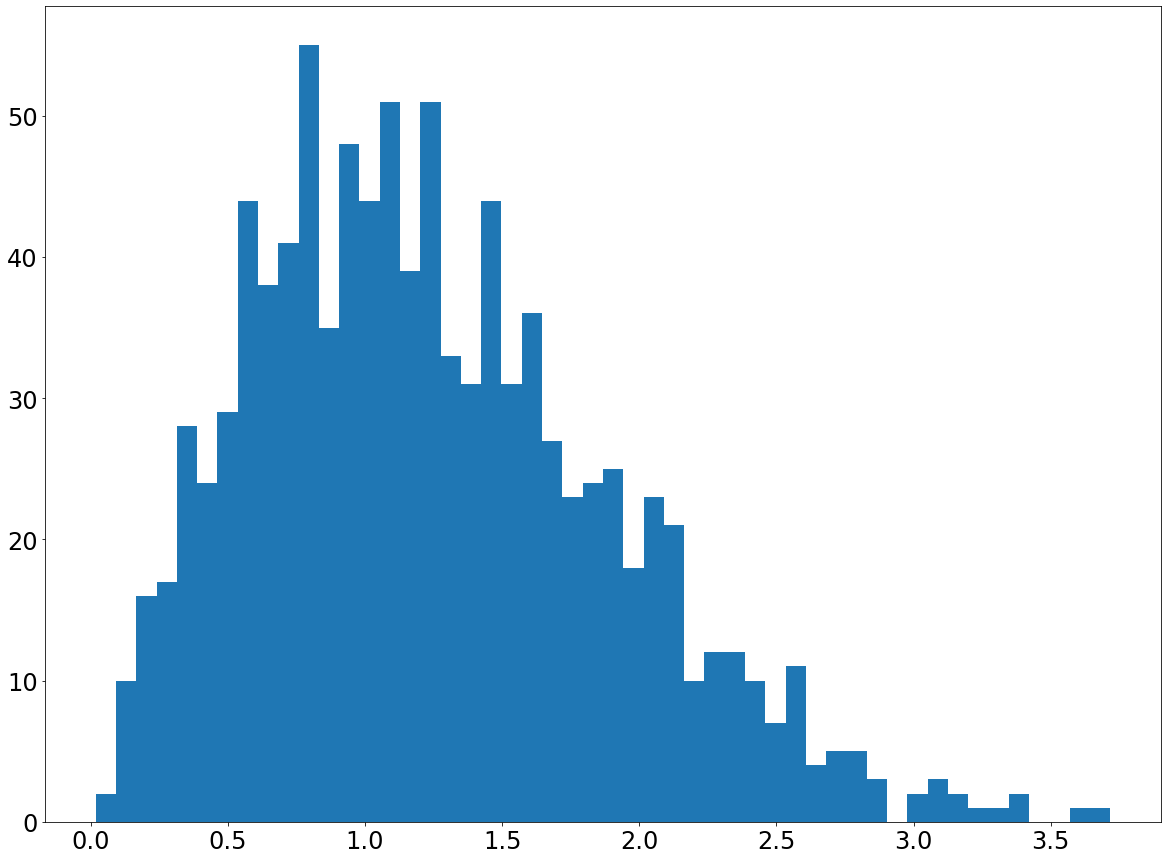

In [70]:
ax = plt.hist(stats.rayleigh.rvs(size = 1000),50)
plt.tick_params(labelsize = 24)
plt.show()

Rayleigh with a small number of random variate samples (size = 1000)

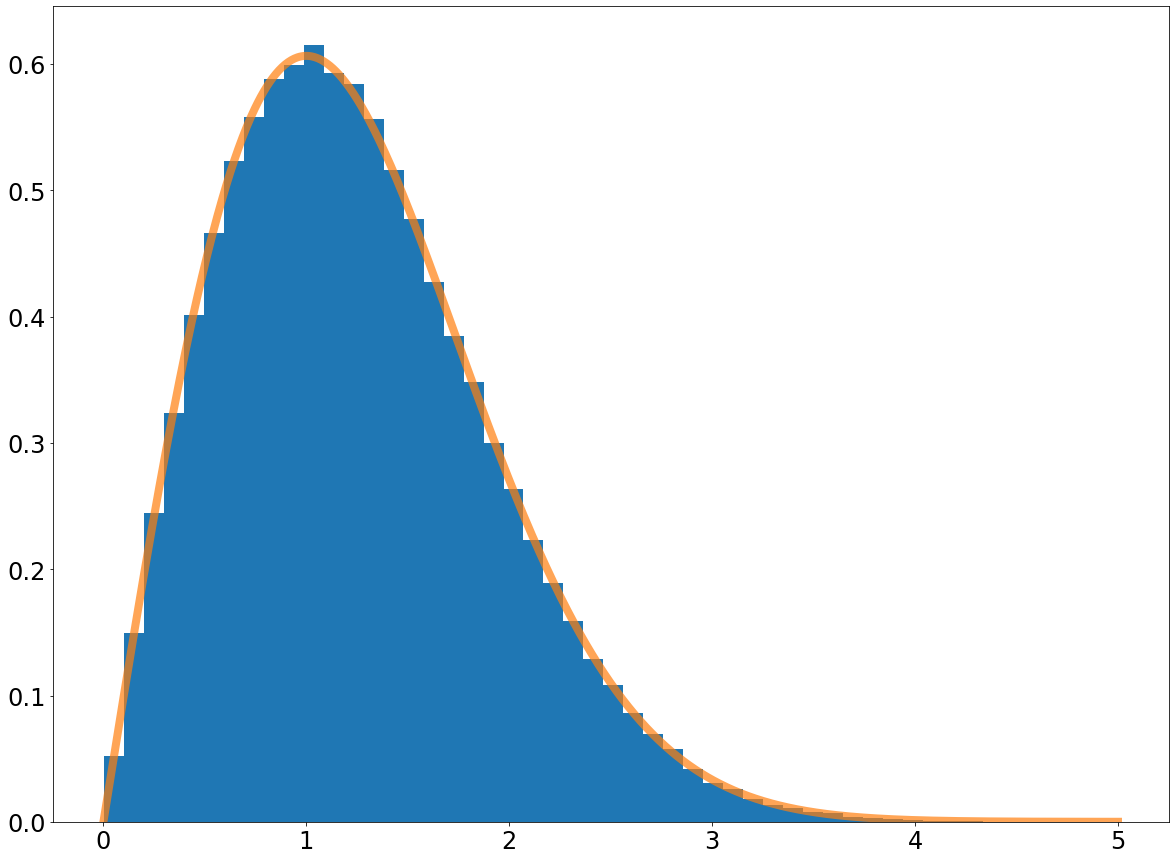

In [71]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
x = np.linspace(0, 5, 1000)
ax.plot(x,stats.rayleigh.pdf(x),linewidth = 8,alpha = 0.7)
plt.show()

Rayleigh distribution with more random variate samples (size = 100,000)

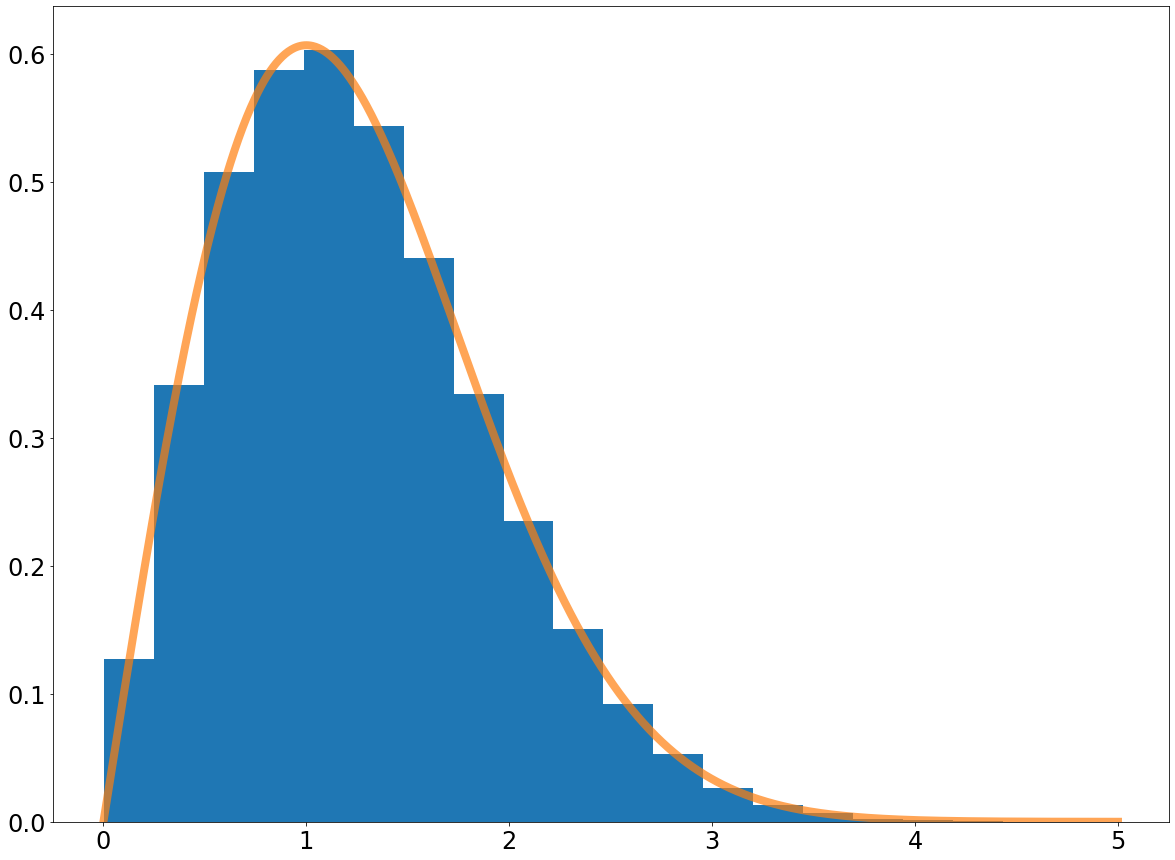

In [73]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,20, density=True)
plt.tick_params(labelsize = 24)
x = np.linspace(0, 5,1000)
ax.plot(x,stats.rayleigh.pdf(x),linewidth = 8,alpha = 0.7)
plt.show()

Rayleigh with 100,000 random variates with smaller number of samples (20)

### Question 3) Signal-free data
3a. The value I am going to select is 5.015
3b. the statistical question I have is what is the probability that a given sample is <= 5.015
3c. (from 0 to 5.015) integral((t/b^2) * e^((-t^2)/(2b^2))dt

In [74]:
print(stats.rayleigh.cdf(1.5))

0.6753475326416503


3e.

In [75]:
print(stats.norm.ppf(0.6753475326416503))

0.454727999525734


### Problem 4)

In [76]:
print(stats.rayleigh.cdf(1))
print(stats.norm.ppf(.3934693402873666))

print(stats.rayleigh.cdf(2))
print(stats.norm.ppf(0.8646647167633873))

print(stats.rayleigh.cdf(2.5))
print(stats.norm.ppf(0.9560630663765926))

0.3934693402873666
-0.27028802073873587
0.8646647167633873
1.1015196284987503
0.9560630663765926
1.7067212947438688


cdf takes in an input value and you'll notice that the larger the input value the large percentage it appears to yield in cdf. This is because it is integrating a longer path of the Rayleigh distribution. Another pattern to notice is that cdf will integrate the area under teh given curve but ppf will take the derivative of said integral and so if you take the ppf of the result of a cdf you comeback with the input value.

### Non-continuous distributions

### Question 1) Binomial Distribution

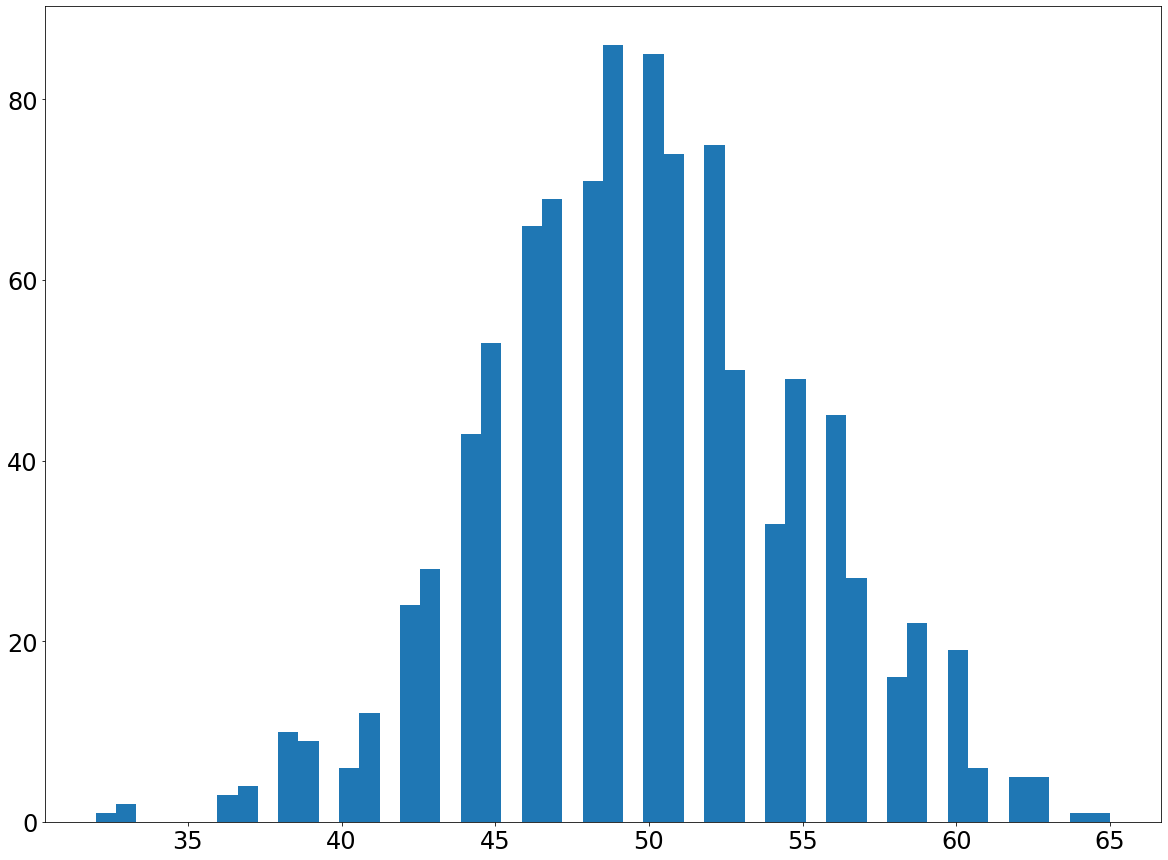

In [80]:
n, p = 100, .5
d = stats.binom.rvs(n, p, size = 1000)
ax = plt.hist(d,50)
# plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.show()

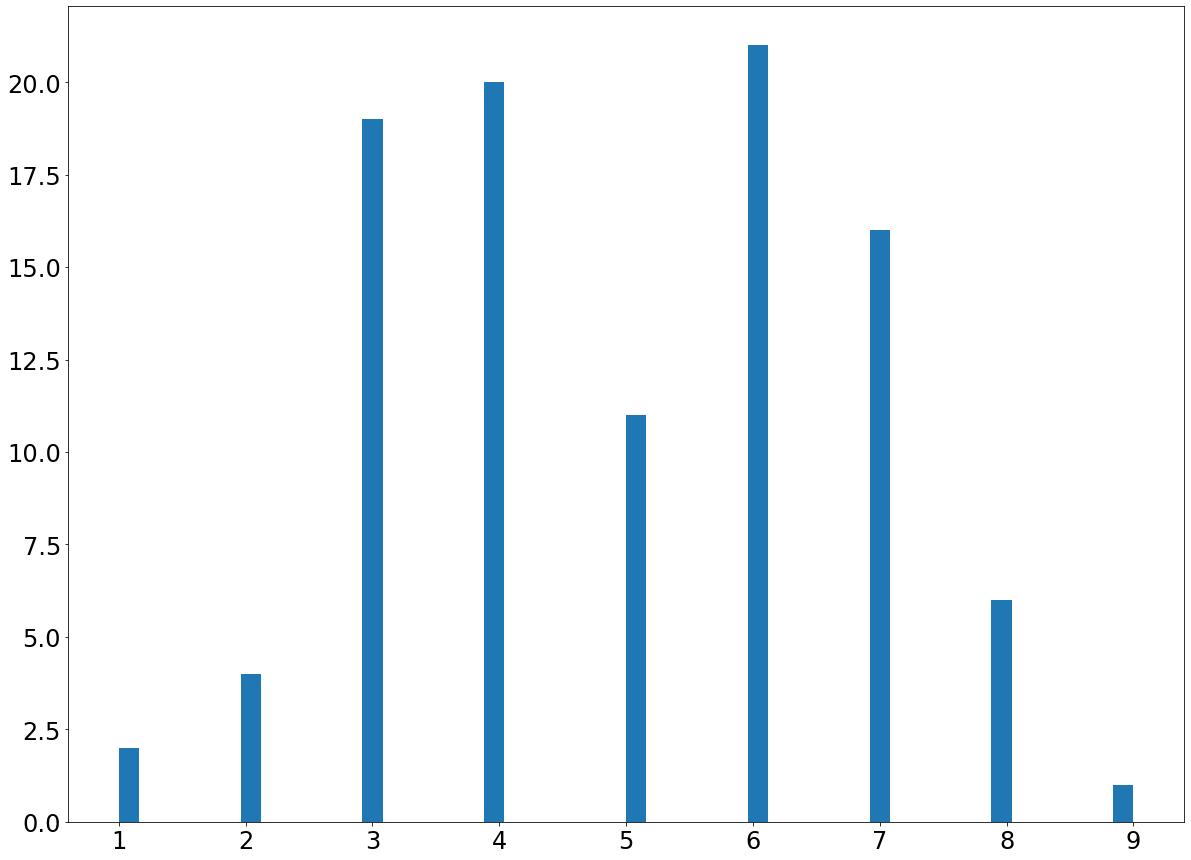

In [90]:
n, p = 10, .5
d = stats.binom.rvs(n, p, size = 100)
ax = plt.hist(d,50)
# plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.show()

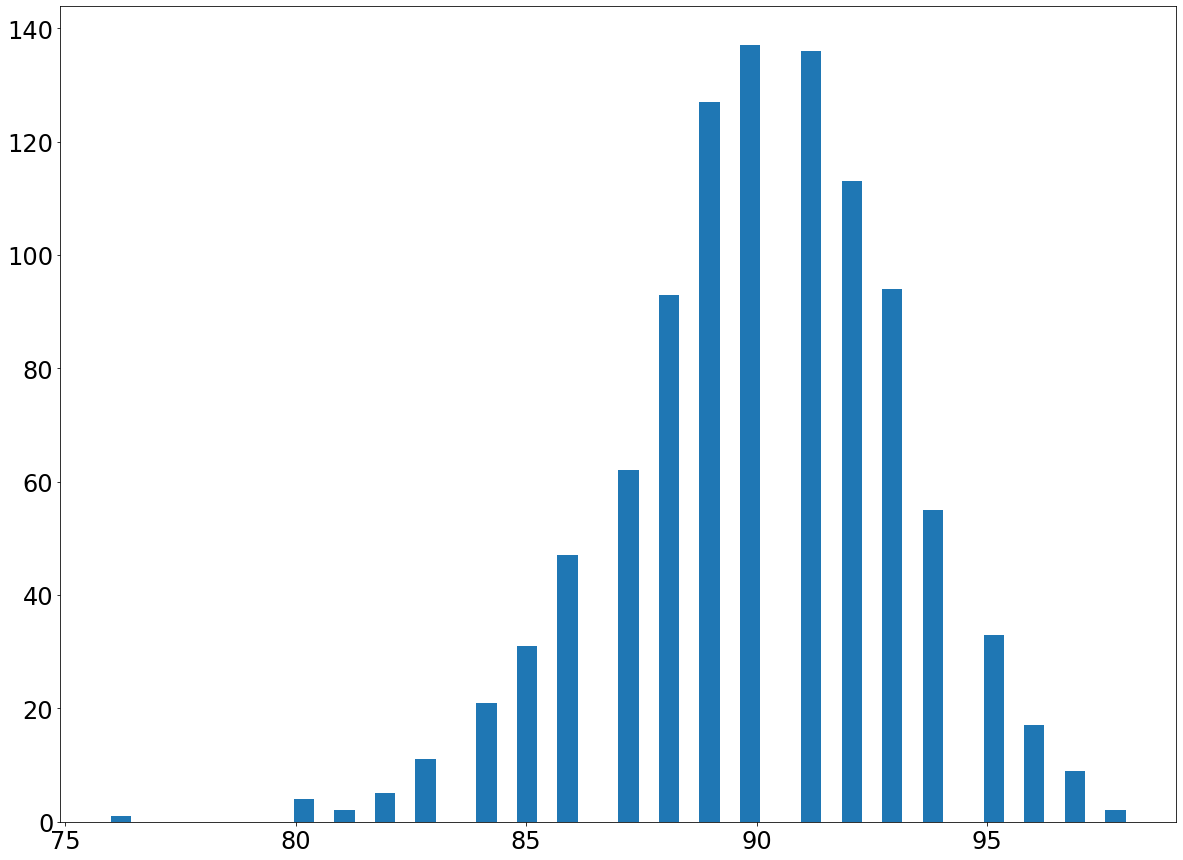

In [92]:
n, p = 100, .9
d = stats.binom.rvs(n, p, size = 1000)
ax = plt.hist(d,50)
# plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.show()

# 1B)

The first plot has (n = 100, p = .5), the second has (n = 10, p = .5), and the third has (n = 100, p = .9). n is responsible for the number of trials and p is responsible for the success probability of each trial. When n is higher a smoother more visibly continuous binomial distribution is displayed and vice-versa. When p is higher the range of the distribution is less/narrower and its peak is higher which is a testament to the higher success probability.

# 1C)

What is the probability that values of 45 and below are successful when size is set to 1000, 100 trials are run (n = 100) and the success probability if .5 (o = .5)?

In [93]:
n, p = 100, .5
d = stats.binom.rvs(n, p, size = 1000)
stats.binom.cdf(45, n, p)

0.18410080866334827

Because the probability and sigma are discrete it means that you can only use this distribution for measurements of binary nature such as "do these people like or dislike cheese?". Moreover you need a large number of trials to more formally fit a continuous distribution.

Parameters of this distribution are continuous because the p parameter in a binomial distribution describes the rate of success which is continuous. The n parameter however is not continuous because it is the number of trials which is discrete. 